<a href="https://colab.research.google.com/github/perses08/IMDB_classification-nlp-/blob/main/IMDB_pretokenized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
imdb, info = tfds.load('imdb_reviews/subwords8k',with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteDIPW9X/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteDIPW9X/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteDIPW9X/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
train = imdb['train']
test = imdb['test']

In [16]:
tokenizer = info.features['text'].encoder

In [5]:
sentence = "Tensoflow, from basics to mastery"

tokenized_string = tokenizer.encode(sentence)

print(tokenized_string)

original_string = tokenizer.decode(tokenized_string)

print(original_string)

[6307, 325, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]
Tensoflow, from basics to mastery


In [6]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
325 ----> so
2934 ----> flow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [15]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train.shuffle(BUFFER_SIZE)
train_dataset = train.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test))

391

In [25]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [26]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 14s 36ms/step - loss: 0.6731 - accuracy: 0.6198 - val_loss: 0.6212 - val_accuracy: 0.6831
Epoch 2/10
391/391 [==============================] - 14s 37ms/step - loss: 0.5074 - accuracy: 0.8001 - val_loss: 0.4313 - val_accuracy: 0.8398
Epoch 3/10
391/391 [==============================] - 14s 37ms/step - loss: 0.3579 - accuracy: 0.8732 - val_loss: 0.3523 - val_accuracy: 0.8659
Epoch 4/10
391/391 [==============================] - 15s 37ms/step - loss: 0.2905 - accuracy: 0.8957 - val_loss: 0.3235 - val_accuracy: 0.8734
Epoch 5/10
391/391 [==============================] - 14s 37ms/step - loss: 0.2531 - accuracy: 0.9087 - val_loss: 0.3118 - val_accuracy: 0.8761
Epoch 6/10
391/391 [==============================] - 14s 37ms/step - loss: 0.2273 - accuracy: 0.9170 - val_loss: 0.3078 - val_accuracy: 0.8778
Epoch 7/10
391/391 [==============================] - 17s 44ms/step - loss: 0.2076 - accuracy: 0.9248 - val_loss: 0.3086 - val_accuracy:

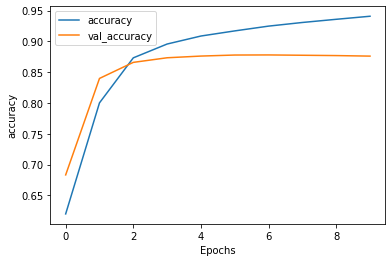

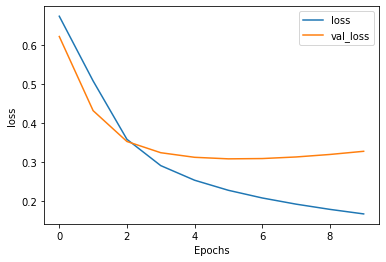

In [27]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")